# Problem Set 3

In [5]:
# imports
import numpy as np
from importlib import reload

import unyt

from oceanpy import constants
from oceanpy.forces import coriolis

from os_classes.ocea257 import chapter1, chapter2
from os_classes import plotting as os_plotting

from bokeh import plotting
from bokeh import models

from IPython.display import Image
from IPython.core.display import HTML

# PS3-1 <font color='blue'>(C-R 4-3)</font> 

## We have periodic fluctuations of the form:

## $u' = U \sin(\phi + \alpha_u)$

## $v' = V \sin(\phi + \alpha_v)$

## $w' = 0$

## And we are asked to calculate the Reynold's stresses, averaged over a $2\pi$-period of $\phi$

## $<u'v'> = \int\limits_0^{2\pi} u' v' d\phi = UV \int\limits_0^{2\pi} \sin(\phi + \alpha_u) \sin(\phi + \alpha_v) \, d\phi$

## Using one of our good ole' 1/2 angle formulas from trig:

## $\sin(x+a) \sin(x+b) = 1/2 [ \cos(a-b) - \cos(a+b+2x)]$

## we have

## $<u'v'> = \frac{UV}{2} \int\limits_0^{2\pi} \left [ \cos(\alpha_u-\alpha_v) - \cos(\alpha_u+\alpha_v+2\phi) \right ] \, d\phi$

## While the 2nd term clearly vanishes, the first term will survive in general, giving:

## $<u'v'> = \frac{UV}{2} 2\pi \cos(\alpha_u-\alpha_v) = \pi \, UV \cos(\alpha_u-\alpha_v)$

## This will be non-zero unless $\alpha_u - \alpha_v = (2n+1) \pi/2$ with $n=0,1,2,..$

----

# PS3-2 <font color='blue'>(C-R 8-1)</font> 

## My intuition tells me that stirring with a spoon will not yield a fluid in solid body rotation, but instead one closer to a constant velocity with radius, i.e. 

## $v(r) = v_0$

## Allowing this ansatz, consider the fluid in a rotating frame with $\Omega = v_0 / R$ with $R$ the radius of the cup.  For this first discussion, we will stir count-clockwise so that $\Omega$ is oriented along the $\hat k$ axis.

## In this case, the fluid interior to the cup edge is moving in the same sense as our rotating frame with higher speed at smaller r.  

## For example, along our $\hat x$-axis, $v = v_0 (R-r)$

## For the fluid moving along the bottom of the cup, the stress $\bar \tau$ for the fluid along the $\hat x$-axis is therefore oriented to $- \hat y$.  

## This means the Ekman transport:

## $\bar M_{\rm E_k} = \frac{1}{\rho f} \, \bar\tau \times \hat k$

## And the direction of the transport is $-\hat y \times \hat k = -\hat x$, i.e. inward.

## If we reverse the spoon $\bar \Omega = - v_0/R \hat k$, the fluid velocity along the $\hat x$-axis reverses and so does the stress.  Therefore, the transport remains inward.

----

# PS3-3 <font color='blue'>(C-R 8-2)</font> 

## Setup

In [2]:
# Setup
phi = 45 * unyt.deg # N

In [3]:
f = coriolis.coriolis_parameter(phi)
f.to('1/s')

unyt_quantity(0.00010313, '1/s')

In [6]:
# Eddy viscosity
nu_E = 10 * unyt.m**2 / unyt.s

In [7]:
# Geostrophic veocity
u0 = 10 * unyt.m / unyt.s

## If we have no horizontal gradients, our momentum equations:

## $+fu = - \frac{1}{\rho_0} \frac{\partial p}{\partial y} + \nu_E \frac{\partial^2 v}{\partial z^2}$

## $-fv = - \frac{1}{\rho_0} \frac{\partial p}{\partial x} + \nu_E \frac{\partial^2 u}{\partial z^2}$

## To maintain the geostropic flow $u = u_0$  (I prefer $u_0$ to $\bar u$), we have:

## $f u_0 = - \frac{1}{\rho_0} \frac{\partial \bar p}{\partial y}$ and $\partial p/\partial x = 0$

## And our equations are now:

##  $+f(u-u_0) = \nu_E \frac{\partial^2 v}{\partial z^2}$

## $-fv =  \nu_E \frac{\partial^2 u}{\partial z^2}$

## Following Ekman (and our in-class derivation), these equations have solutions of the form, 

## $u = u_0 + A \exp(\lambda z)$

### and application of the Boundary conditions ($u=0, v=0$ at $z=0$; $u=u_0, v=0$ at $z=\infty$) gives:

## $u = u_0 \left [ 1 - \exp(-z/d) \cos(z/d) \right ]$

## $v = u_0 \exp(-z/d) \sin(z/d)$

## with $d \equiv \sqrt{2 \nu_E / f}$

In [8]:
d = np.sqrt(2 * nu_E/ f)
d.to('m')

unyt_quantity(440.38294434, 'm')

## Last, let's calculate the vertically averaged flow across the isobars,  i.e. Transverse:  

## $V = \int\limits_0^\infty v dz = u_0 d /2$  

### [Evaluated with two applications of intergration by parts which returns us to where we started and gives the factor of 1/2]

In [10]:
V = u0 * d / 2
V.to('m**2/s')

unyt_quantity(2201.91472169, 'm**2/s')

## Is there any vertical velocity?

## On small scales (where $f$=const) and with the absence of horizontal gradients, our continuity equation:

## $\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} + \frac{\partial w}{\partial z} = 0$

## Reduces to $\frac{\partial w}{\partial z} = 0$

## And with a boundary condition $w=0$ at $z=0$, this implies no vertical velocity.

----

# PS3-4 <font color='blue'>(C-R 8-6)</font>:  Radioactive

## Setup

In [11]:
phi = 33 * unyt.deg # N
f = 8e-5 / unyt.s

In [13]:
# Viscosity
nu_E = 1e-2 * unyt.m**2 / unyt.s

In [14]:
# Vortex flow with angular speed
omega = 1e-5 / unyt.s

## We are to assume a homogeneous ocean with a steady geostrophic flow

## In class, we were given without derivation that the vertical flow at the top of the Ekman layer is:

## $w(z \approx d) = \frac{d}{2} \left ( \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y} \right ) 
= \frac{d}{2} \xi$

## with

## $d \equiv \sqrt{2 \nu_E / f}$

## This is derived by a vertical integration of the continuity equation:

### $\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} + \frac{\partial w}{\partial z} = 0$

### $w = \int \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right ) dz
  = \frac{\partial U}{\partial x} + \frac{\partial V}{\partial y}$

### and geostrophic equilibrium:

### $-f \bar v = - \frac{1}{\rho_0} \frac{\partial \bar p}{\partial x}$

### $f \bar u = - \frac{1}{\rho_0} \frac{\partial \bar p}{\partial y}$

## One may show further (as we did in lecture; see also equations 8.21-8.23 of C-R) that:

## $U = - \frac{d}{2} \left ( \bar u + \bar v \right )$

## $V = \frac{d}{2} \left ( \bar u - \bar v \right )$ 

## Taking the derivative of our geostrophic equilbrium equations:

## $\frac{\partial \bar u}{\partial x} = - \frac{1}{\rho_0} \frac{\partial^2 \bar p}{\partial y \partial x}
= -f \frac{\partial \bar v}{\partial y}$

## and

## $\frac{\partial \bar v}{\partial y} = -f \frac{\partial \bar u}{\partial x}$

## Some algebra spits out:

## $\bar w = \frac{d}{2} \left ( \frac{\partial \bar v}{\partial x} - \frac{\partial \bar u}{\partial y} \right )$

## Numerically

In [16]:
d = np.sqrt(2 * nu_E/f)
d.to('m')

unyt_quantity(15.8113883, 'm')

In [17]:
w = (d/2) * omega
w.to('m/s')

unyt_quantity(7.90569415e-05, 'm/s')

## Whoa, that is small

## And yet

In [18]:
h = 3000 * unyt.m

In [20]:
t = h/w
t.to('year')

unyt_quantity(1.20247839, 'yr')

## Uh-oh

----

# PS3-5 Garbage

## Here is an image of the Pacific garbage patch:

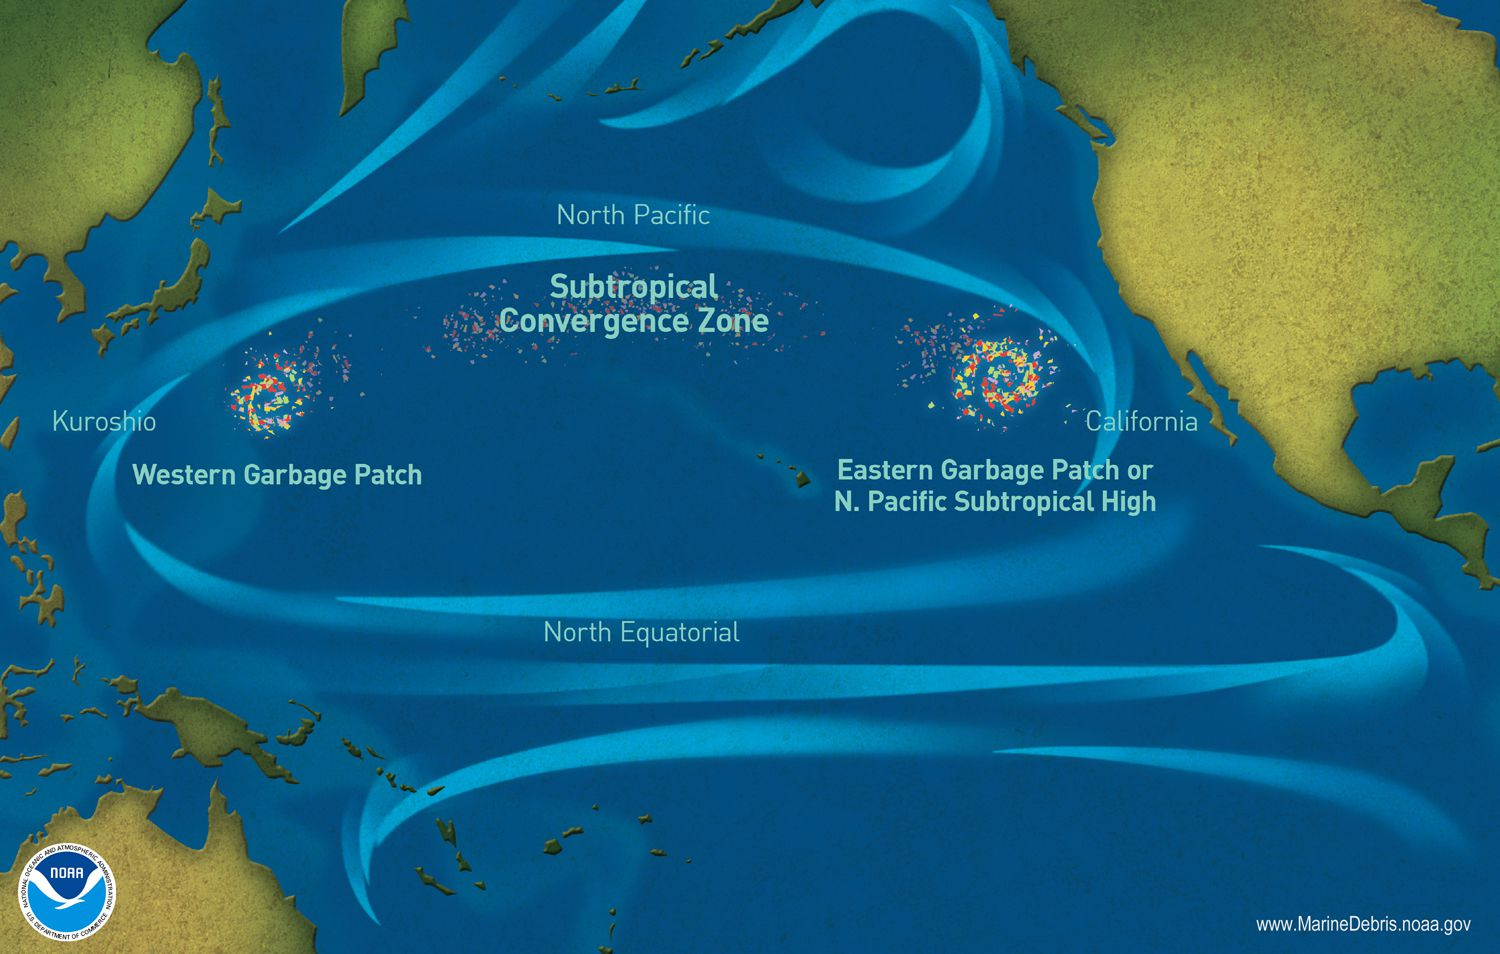

In [8]:
Image(filename = './cc2bbae1-0699-45b9-b86e-a03a23b28077.jpg', width=1000)#, height=100)

## These, it is suggested to us, are driven by the wind stresses of the Pacific, described here:

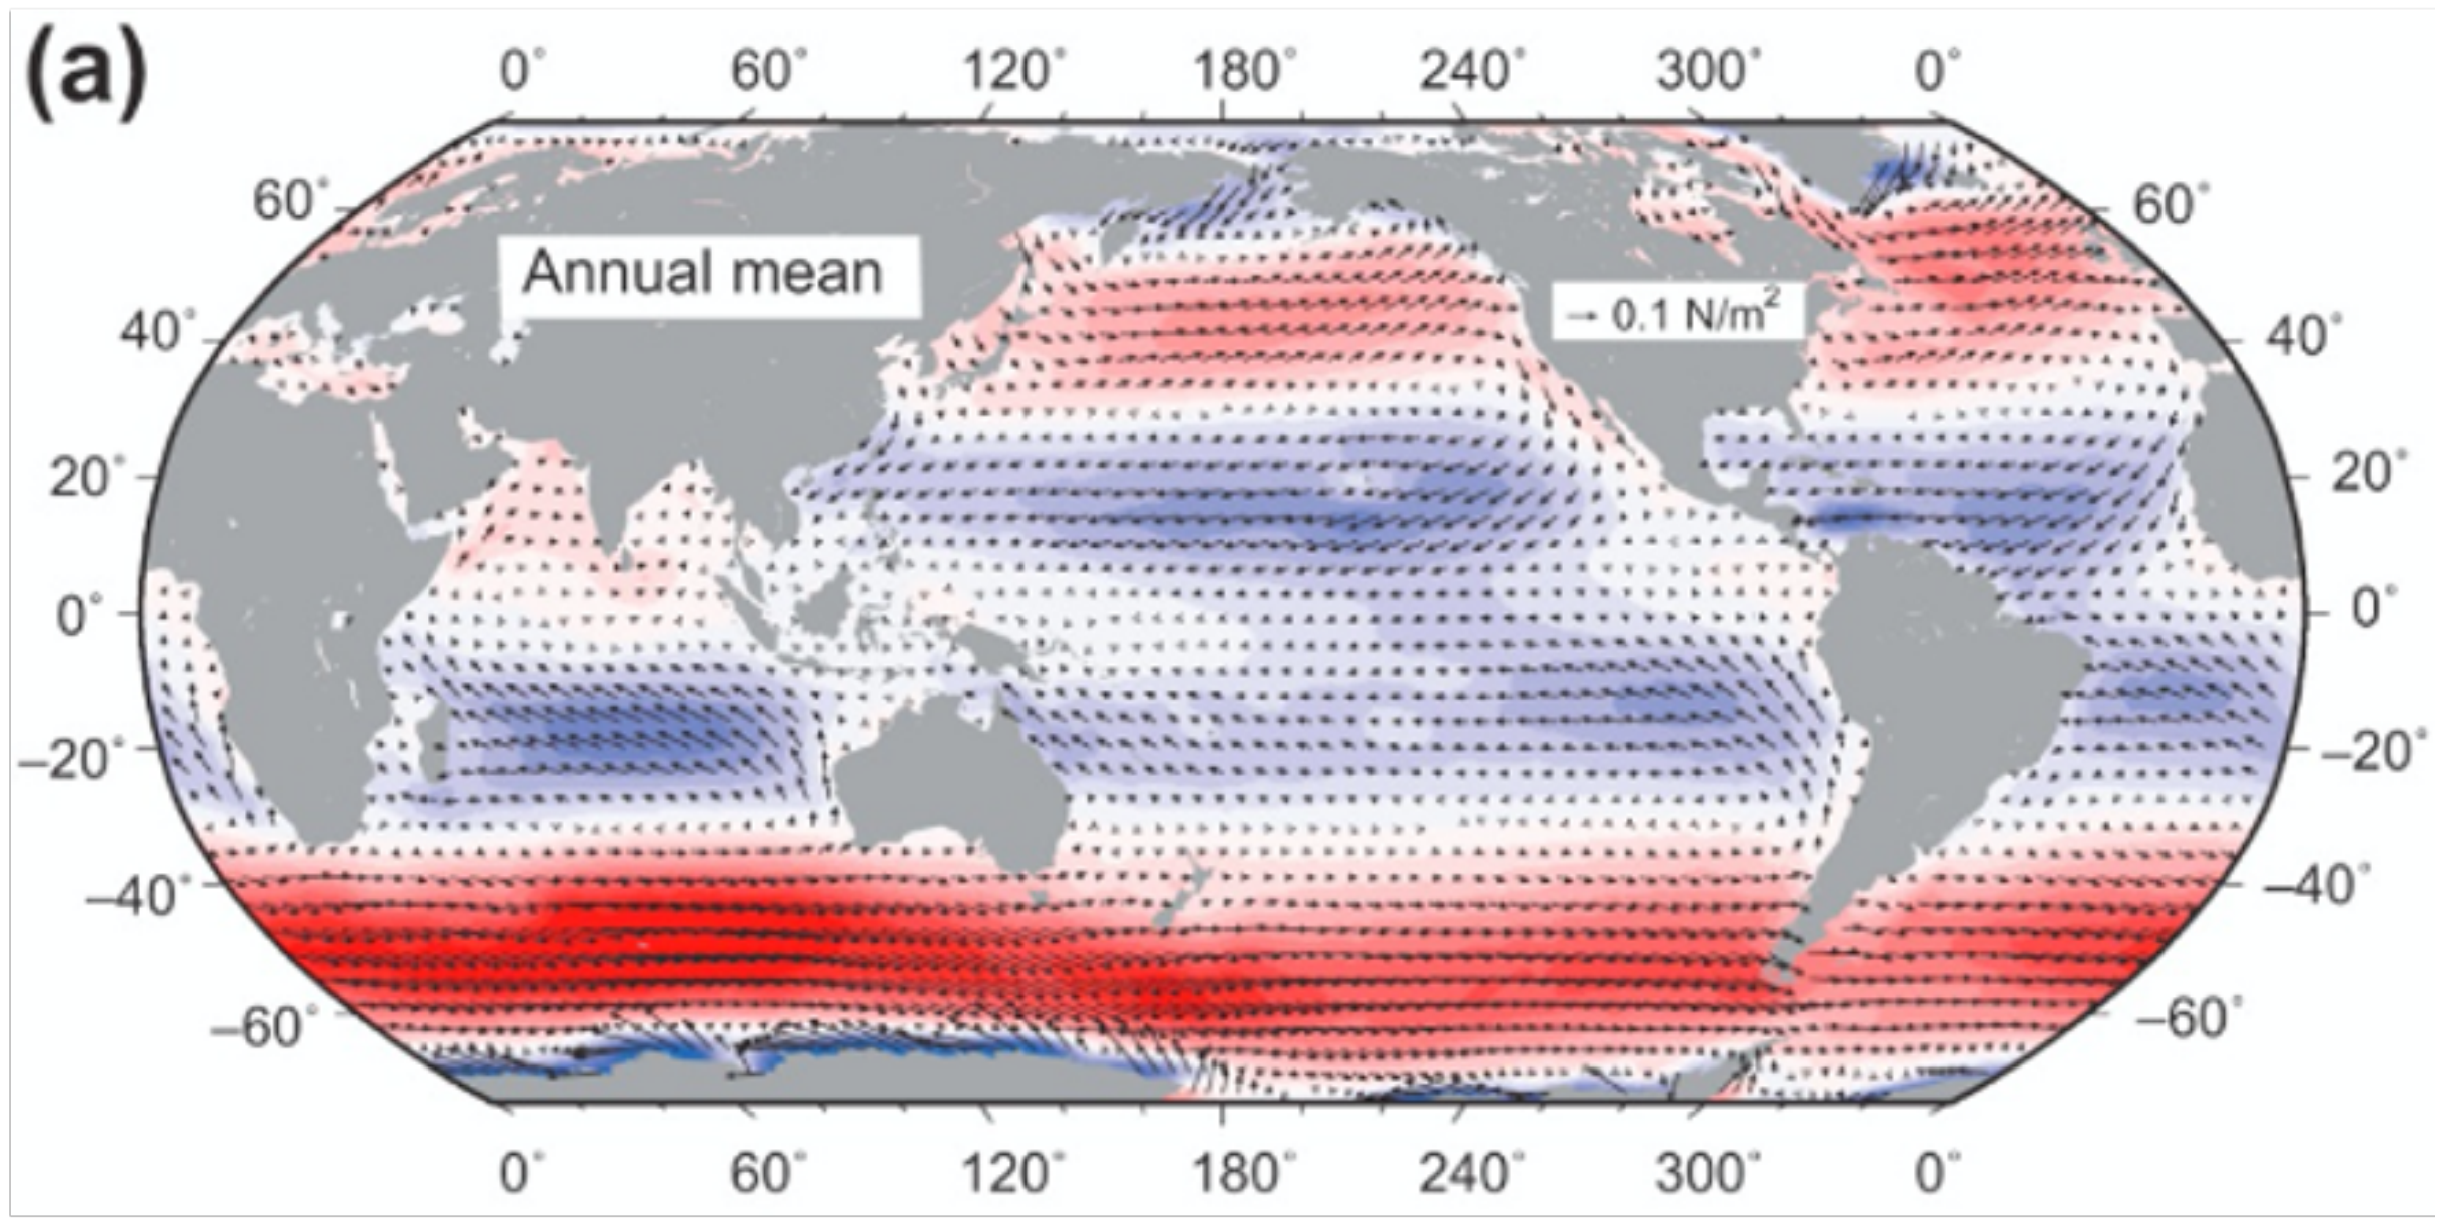

In [7]:
Image(filename = './kalnay_wind_stress.png', width=1000)#, height=100)

## We can see the winds at $\approx 20^\circ$N are to the West while those at $\approx 40^\circ$N are to the East.

## Similar to what we derived for the Ekman transport along the bottom, the flux is directed $\approx 45\deg$ to the right of the wind stress in the Northern hemisphere.  This follows from:

## $\bar M_{\rm E_k} = \frac{1}{\rho f} \, \bar\tau \times \hat k$ with $\tau$ aligned with the wind

## This has the effect of gathering the garbage inbetween the winds at $20^\circ$ and $40^\circ$, i.e. at $\approx 30^\circ$N.